In [2]:
import sympy
from sympy import init_session

init_session()

IPython console for SymPy 1.6.1 (Python 3.8.3-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.6.1/



In [13]:
theta1, theta2, theta3 = symbols("theta1 theta2 theta3")

n1, n2, n3 = symbols("n_1 n_2 n_3")

t, wl = symbols("t lambda")

In [41]:
def Mp(n1, theta1, n2, theta2):
    m00 = m11 = (cos(theta1)/cos(theta2) - n1/n2)/2
    m01 = m10 = (cos(theta1)/cos(theta2) + n1/n2)/2
    return Matrix([[m00,m01],[m10,m11]])

def Ms(n1, theta1, n2, theta2):
    m00 = m11 = (1 - n1*cos(theta1)/(n2*cos(theta2)))/2
    m01 = m10 = (1 + n1*cos(theta1)/(n2*cos(theta2)))/2
    return Matrix([[m00,m01],[m10,m11]])

def P(theta, n, thickness, wavelen):
    kx = thickness/wavelen
    cos_th = cos(theta)
    arg = kx*2*pi*((n-1)/cos_th + cos_th)
    m10 = exp(-1.0j*arg)
    m01 = exp(1.0j*arg)
    return Matrix([[0, m01], [m10, 0]])

# P-Polarisation Transfer Matrix

In [22]:
M = Mp(n2, theta2, n3, theta3)*P(theta2, n2,t, wl)*Mp(n1, theta1, n2, theta2)

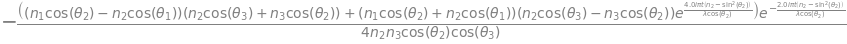

In [36]:
m00 = M[0,0].simplify()
m00

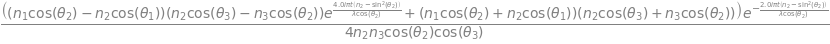

In [37]:
m01 = M[0,1].simplify()
m01

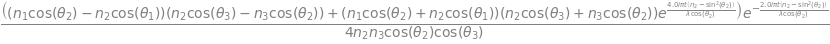

In [38]:
m10 = M[1,0].simplify()
m10

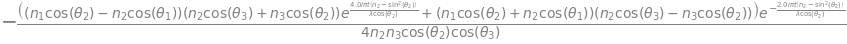

In [39]:
m11 = M[1,1].simplify()
m11

In [34]:
N = M.subs([(theta1,0), (theta2,0), (theta3,0), (n2,n3), (t,0)])
N

⎡   n₁    1    n₁    1 ⎤
⎢- ──── + ─   ──── + ─ ⎥
⎢  2⋅n₃   2   2⋅n₃   2 ⎥
⎢                      ⎥
⎢  n₁    1      n₁    1⎥
⎢ ──── + ─   - ──── + ─⎥
⎣ 2⋅n₃   2     2⋅n₃   2⎦

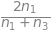

In [35]:
(N[1,0] - N[1,1]*N[0,0]/N[0,1]).simplify()

In [40]:
print_python(m00)

n_1 = Symbol('n_1')
theta2 = Symbol('theta2')
n_2 = Symbol('n_2')
theta1 = Symbol('theta1')
theta3 = Symbol('theta3')
n_3 = Symbol('n_3')
t = Symbol('t')
lambda_ = Symbol('lambda')
e = -((n_1*cos(theta2) - n_2*cos(theta1))*(n_2*cos(theta3) + n_3*cos(theta2)) + (n_1*cos(theta2) + n_2*cos(theta1))*(n_2*cos(theta3) - n_3*cos(theta2))*exp(4.0*I*pi*t*(n_2 - sin(theta2)**2)/(lambda_*cos(theta2))))*exp(-2.0*I*pi*t*(n_2 - sin(theta2)**2)/(lambda_*cos(theta2)))/(4*n_2*n_3*cos(theta2)*cos(theta3))


# Now for S-polarisation

In [43]:
MS = Ms(n2, theta2, n3, theta3)*P(theta2, n2,t, wl)*Ms(n1, theta1, n2, theta2)

TypeError: unsupported operand type(s) for *: 'MutableDenseMatrix' and 'NoneType'

In [44]:
ms00 = MS[0,0].simplify()
ms01 = MS[0,1].simplify()
ms10 = MS[1,0].simplify()
ms11 = MS[1,1].simplify()

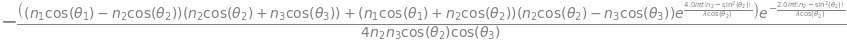

In [45]:
ms00

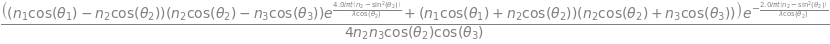

In [46]:
ms01

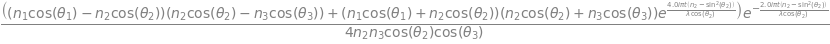

In [47]:
ms10

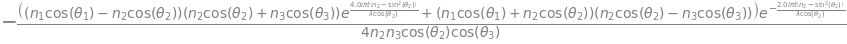

In [48]:
ms11